In [1]:
  # README
# Go to https://www.kaggle.com/c/ieee-fraud-detection
# Sign in to your kaggle account and accept the rules of the compeition for the above link
# Now, go to your account section and download kaggle.json file by clicking on Create New API token
# Upload the downloaded file by running the next cell
# Now you are all set to go

# Importing Data 

In [2]:
# uploading kaggle json file
# from google.colab import files
# files.upload()

In [3]:
#creating kaggle folder
!mkdir ~/.kaggle

mkdir: /Users/anshitbansal/.kaggle: File exists


In [4]:
# copy kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


In [5]:
#  permission for json to act
!chmod 600 ~/.kaggle/kaggle.json

chmod: /Users/anshitbansal/.kaggle/kaggle.json: No such file or directory


In [6]:
!kaggle competitions download -c ieee-fraud-detection

zsh:1: command not found: kaggle


In [7]:
!unzip ieee-fraud-detection.zip

unzip:  cannot find or open ieee-fraud-detection.zip, ieee-fraud-detection.zip.zip or ieee-fraud-detection.zip.ZIP.


# Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv('data/train_transaction.csv')
train_identity = pd.read_csv('data/train_identity.csv')

In [10]:
train_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [11]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [12]:
train_data.tail(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590520,3577520,0,15810785,93.000,W,17150,292.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590521,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590522,3577522,0,15810823,54.500,W,3166,559.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590523,3577523,0,15810833,58.950,W,13076,456.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590524,3577524,0,15810836,75.000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590525,3577525,0,15810866,57.950,W,11942,570.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590526,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590527,3577527,0,15810883,189.950,W,6453,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590528,3577528,0,15810907,279.950,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590529,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train_identity.sort_values(by=['TransactionID'])

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [14]:
# merging train_identity and train_data
data = pd.merge(train_identity, train_data, on='TransactionID', how='outer')

In [15]:
data

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
features = data.columns
missing_data = pd.DataFrame(features, columns=['Features'])
null_perc = []

for feature in features:
  null_perc.append(((data[feature].isna().sum())/data.shape[0])*100)

missing_data['null_perc'] = null_perc

In [17]:
missing_data.sort_values(by=['null_perc'], ascending=False, inplace=True, ignore_index=True)

In [18]:
missing_data.head(15)

,Features,null_perc
0,id_24,99.196159
1,id_25,99.130965
2,id_07,99.127070
3,id_08,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_27,99.124699
7,id_23,99.124699
8,id_22,99.124699
9,dist2,93.628374


In [19]:
# features_to_drop = [feature for feature in data.columns if missing_data[missing_data.Features==feature].null_perc>90]

In [20]:
features_to_drop = missing_data.head(12).Features
features_to_drop

0     id_24
1     id_25
2     id_07
3     id_08
4     id_21
5     id_26
6     id_27
7     id_23
8     id_22
9     dist2
10       D7
11    id_18
Name: Features, dtype: object

In [21]:
data.drop(features_to_drop, axis='columns', inplace = True)

In [22]:
import matplotlib.pyplot as plt

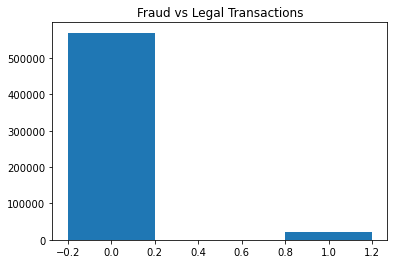

In [23]:
fraudCount = data['isFraud'].sum()
legalCount = data.shape[0] - fraudCount

plt.bar([1,0], [fraudCount, legalCount], width=0.4)
plt.title('Fraud vs Legal Transactions');

In [24]:
missing_data.tail(200)

,Features,null_perc
234,V35,28.612626
235,V36,28.612626
236,V37,28.612626
237,V38,28.612626
238,V39,28.612626
...,...,...
429,C10,0.000000
430,C11,0.000000
431,C13,0.000000
432,C14,0.000000


In [25]:
Ds = [ col for col in data.columns if col[0]=='D']
Ds.remove('DeviceInfo')
Ds.remove('DeviceType')

In [26]:
data[Ds].isnull().sum()/5905.40

D1      0.214888
D2     47.549192
D3     44.514851
D4     28.604667
D5     52.467403
D6     87.606767
D8     87.312290
D9     87.312290
D10    12.873302
D11    47.293494
D12    89.041047
D13    89.509263
D14    89.469469
D15    15.090087
dtype: float64

In [27]:
for x in range(len(Ds)):
  data[Ds[x]].fillna(data[Ds[x]].median(), inplace=True)

In [28]:
data[Ds].isnull().sum()/5905.40

D1     0.0
D2     0.0
D3     0.0
D4     0.0
D5     0.0
D6     0.0
D8     0.0
D9     0.0
D10    0.0
D11    0.0
D12    0.0
D13    0.0
D14    0.0
D15    0.0
dtype: float64

In [29]:
Cs = [ col for col in data.columns if col[0]=='C']
data[Cs]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [30]:
data[Cs].isnull().sum()/5905.40

C1     0.0
C2     0.0
C3     0.0
C4     0.0
C5     0.0
C6     0.0
C7     0.0
C8     0.0
C9     0.0
C10    0.0
C11    0.0
C12    0.0
C13    0.0
C14    0.0
dtype: float64

In [31]:
IDs = [ col for col in data.columns if col[0]=='i']
IDs.remove('isFraud')
data[IDs]

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
num_IDs = []
cat_IDs = []
for x in IDs:
  if data[x].dtype=='O':
    cat_IDs.append(x)
  else: 
    num_IDs.append(x)  

In [33]:
for x in range(len(num_IDs)):
  data[num_IDs[x]].fillna(data[num_IDs[x]].median(), inplace=True)

In [34]:
data[IDs].isnull().sum()/5905.40

id_01     0.000000
id_02     0.000000
id_03     0.000000
id_04     0.000000
id_05     0.000000
id_06     0.000000
id_09     0.000000
id_10     0.000000
id_11     0.000000
id_12    75.576083
id_13     0.000000
id_14     0.000000
id_15    76.126088
id_16    78.098012
id_17     0.000000
id_19     0.000000
id_20     0.000000
id_28    76.127273
id_29    76.127273
id_30    86.865411
id_31    76.245132
id_32     0.000000
id_33    87.589494
id_34    86.824771
id_35    76.126088
id_36    76.126088
id_37    76.126088
id_38    76.126088
dtype: float64

In [35]:
for x in range(len(cat_IDs)):
  data[cat_IDs[x]].fillna('missing', inplace=True)

In [36]:
data[IDs]

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,0.0,100.0,NotFound,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,Found,missing,chrome 62.0,24.0,missing,missing,F,F,T,T
3,-5.0,221832.0,0.0,0.0,0.0,-6.0,0.0,0.0,100.0,NotFound,...,NotFound,missing,chrome 62.0,24.0,missing,missing,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590536,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590537,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590538,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing


In [37]:
data[IDs].isnull().sum()/5905.40

id_01    0.0
id_02    0.0
id_03    0.0
id_04    0.0
id_05    0.0
id_06    0.0
id_09    0.0
id_10    0.0
id_11    0.0
id_12    0.0
id_13    0.0
id_14    0.0
id_15    0.0
id_16    0.0
id_17    0.0
id_19    0.0
id_20    0.0
id_28    0.0
id_29    0.0
id_30    0.0
id_31    0.0
id_32    0.0
id_33    0.0
id_34    0.0
id_35    0.0
id_36    0.0
id_37    0.0
id_38    0.0
dtype: float64

In [38]:
Ms = [ col for col in data.columns if col[0]=='M']
data[Ms]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,T,T,T,M0,F,T,NaN,NaN,NaN


In [39]:
data[Ms].isnull().sum()/5905.40

M1    45.907136
M2    45.907136
M3    45.907136
M4    47.658753
M5    59.349409
M6    28.678836
M7    58.635317
M8    58.633115
M9    58.633115
dtype: float64

In [40]:
for x in Ms:
  print(f"{x}: {data[x].unique()}")

M1: [nan 'T' 'F']
M2: [nan 'T' 'F']
M3: [nan 'T' 'F']
M4: [nan 'M0' 'M2' 'M1']
M5: [nan 'F' 'T']
M6: [nan 'T' 'F']
M7: [nan 'F' 'T']
M8: [nan 'F' 'T']
M9: [nan 'F' 'T']


In [41]:
for x in Ms:
  print(f"{data[x].value_counts()}")

T    319415
F        25
Name: M1, dtype: int64
T    285468
F     33972
Name: M2, dtype: int64
T    251731
F     67709
Name: M3, dtype: int64
M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64
F    132491
T    107567
Name: M5, dtype: int64
F    227856
T    193324
Name: M6, dtype: int64
F    211374
T     32901
Name: M7, dtype: int64
F    155251
T     89037
Name: M8, dtype: int64
T    205656
F     38632
Name: M9, dtype: int64


In [42]:
data.M1.fillna('T',inplace=True)
data.M2.fillna('T',inplace=True)
data.M3.fillna('T', inplace=True)
data.M4.fillna('M0', inplace=True)
data.M5.fillna('F', inplace=True)
data.M6.fillna('F', inplace=True)
data.M7.fillna('F', inplace=True)
data.M8.fillna('F', inplace=True)
data.M9.fillna('T', inplace=True)

In [43]:
Vs = [ col for col in data.columns if col[0]=='V']
data[Vs]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
for x in Vs:
  print(data[x].isnull().sum()/5905.40)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [84]:
data[Vs] = data[Vs].fillna(data[Vs].median())

In [86]:
data.P_emaildomain.unique()

array(['gmail.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'yahoo.com', 'missing', 'outlook.com', 'charter.net',
       'comcast.net', 'optonline.net', 'embarqmail.com', 'live.com.mx',
       'icloud.com', 'juno.com', 'att.net', 'msn.com', 'yahoo.com.mx',
       'cox.net', 'servicios-ta.com', 'me.com', 'hotmail.es', 'live.com',
       'verizon.net', 'bellsouth.net', 'sbcglobal.net', 'gmx.de',
       'mail.com', 'frontier.com', 'frontiernet.net', 'outlook.es',
       'suddenlink.net', 'roadrunner.com', 'mac.com', 'earthlink.net',
       'web.de', 'twc.com', 'ymail.com', 'yahoo.fr', 'yahoo.de',
       'windstream.net', 'gmail', 'rocketmail.com', 'cfl.rr.com',
       'yahoo.es', 'live.fr', 'q.com', 'prodigy.net.mx', 'yahoo.co.uk',
       'hotmail.fr', 'hotmail.de', 'netzero.net', 'cableone.net',
       'aim.com', 'ptd.net', 'centurylink.net', 'hotmail.co.uk',
       'netzero.com', 'sc.rr.com', 'yahoo.co.jp', 'protonmail.com'],
      dtype=object)

In [87]:
data.R_emaildomain.unique()

array(['missing', 'gmail.com', 'hotmail.com', 'outlook.com',
       'anonymous.com', 'charter.net', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'prodigy.net.mx', 'yahoo.co.uk', 'windstream.net',
       'suddenlink.net', 'hotmail.fr', 'ptd.net', 'hotmail.de',
       'frontier.com', 'cfl.rr.com', 'hotmail.co.uk', 'netzero.com',
       'netzero.net', 'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [88]:
data.P_emaildomain.fillna('missing',inplace=True)
data.R_emaildomain.fillna('missing',inplace=True)

In [89]:
data.DeviceType.unique()

array(['mobile', 'desktop', 'missing'], dtype=object)

In [90]:
data.DeviceType.fillna('missing',inplace=True)

In [91]:
data.DeviceInfo.fillna('missing', inplace=True)

In [92]:
data.addr1.fillna(data.addr1.median(), inplace=True)

In [93]:
data.addr2.fillna(data.addr2.median(), inplace=True)

In [94]:
data.dist1

0          8.0
1          8.0
2          8.0
3          8.0
4          8.0
          ... 
590535    48.0
590536     8.0
590537     8.0
590538     3.0
590539     8.0
Name: dist1, Length: 590540, dtype: float64

In [95]:
data.dist1.isnull().sum()/5905.4

0.0

In [96]:
data.dist1.describe()

count    590540.000000
mean         52.585031
std         242.353179
min           0.000000
25%           8.000000
50%           8.000000
75%           8.000000
max       10286.000000
Name: dist1, dtype: float64

In [97]:
data[data.dist1==0][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_15813/18364525.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==0][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9
146065,2989302,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,1,1,0,0,0
146118,2989367,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,1,1,0,0,0
147117,2990583,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,1,1,0,0,0
149742,2993924,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
150630,2995056,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585550,3571476,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,1,0
586711,3572872,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,1,1,0
587590,3573958,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,1,1,0
587666,3574043,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,1,1,0


In [98]:
data[data.dist1==3][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_15813/1117039078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==3][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9
152959,2998243,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
157131,3003826,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
158188,3005375,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,1,0,0,0,0
158406,3005661,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,1,0,0,0,0
159002,3006533,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568049,3549893,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,1,1,0,0,0,0
569313,3551412,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
569357,3551458,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0
584726,3570446,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,0,1,0,0,0


In [99]:
data[data.dist1==8][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_15813/1858050885.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==8][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9
52,2987240,0.0,169947.0,0.0,0.0,3.0,0.0,0.0,0.0,100.000000,...,2,0,0,0,1,0,0,0,0,0
53,2987243,0.0,222455.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,2,0,0,0,1,0,0,0,0,0
54,2987245,0.0,271870.0,0.0,0.0,3.0,0.0,0.0,0.0,100.000000,...,2,0,0,0,1,0,0,0,0,0
69,2987288,-20.0,258138.0,0.0,0.0,0.0,-1.0,0.0,0.0,100.000000,...,3,0,0,0,1,0,0,0,0,0
86,2987367,-5.0,141271.0,0.0,0.0,9.0,-81.0,0.0,0.0,97.540001,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589610,3576410,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0,0,0,0,2,0,1,0,1,0
589842,3576693,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0,0,0,0,0,0,1,0,0,0
590165,3577088,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0,0,0,0,0,0,0,0,0,0
590298,3577250,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data[data.dist1==24][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_15813/1705885328.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==24][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9
149121,2993125,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
177388,3036282,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,2,1,1,0,0,0
181540,3043408,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,2,1,0,0,0,0
183793,3047532,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,2,1,0,0,0,0
185438,3050564,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
189992,3059432,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
192873,3065298,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
192944,3065436,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
192971,3065515,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
193300,3066225,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,1,0,0,0,0


In [101]:
data.dist1.unique()

array([   8.,   19.,  287., ..., 4851., 2042., 4728.])

In [102]:
data[data.dist1.isnull()][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_15813/229905707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1.isnull()][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9


In [103]:
data.dist1.mode()

0    8.0
Name: dist1, dtype: float64

In [104]:
data.dist1.median()

8.0

In [105]:
data.dist1.fillna(data.dist1.median(), inplace=True)

In [106]:
missing1=[]
for x in data.columns:
  if data[x].isnull().sum()>0:
    missing1.append(x)
    print(x)

In [107]:
cards = ['card2','card3','card4','card5','card6']
for x in cards:
  print(f"{x}: {data[x].isnull().sum()/5905.4}")

card2: 0.0
card3: 0.0
card4: 0.0
card5: 0.0
card6: 0.0


In [108]:
data[cards]

,card2,card3,card4,card5,card6
0,514.0,150.0,mastercard,102.0,credit
1,100.0,150.0,visa,226.0,debit
2,352.0,117.0,mastercard,134.0,credit
3,375.0,185.0,mastercard,224.0,debit
4,555.0,150.0,visa,226.0,debit
...,...,...,...,...,...
590535,361.0,150.0,visa,226.0,debit
590536,225.0,150.0,mastercard,224.0,debit
590537,595.0,150.0,mastercard,224.0,debit
590538,481.0,150.0,mastercard,224.0,debit


In [109]:
data['card2'].fillna(data['card2'].median(), inplace=True)
data['card3'].fillna(data['card3'].median(), inplace=True)
data['card5'].fillna(data['card5'].median(), inplace=True)

In [110]:
data.card4.fillna('missing', inplace=True)
data.card6.fillna('missing', inplace=True)

In [111]:
missing1=[]
for x in data.columns:
  if data[x].isnull().sum()>0:
    missing1.append(x)

In [112]:
len(missing1)

0

Now we have replaced all the missing values with median for numerical data and with mode for categorical data

**Encoding of categorical data**

In [113]:
cat_features = []

for col in data.columns:
  if data[col].dtype =='O':
    cat_features.append(col)

cat_features    

['id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [114]:
for col in cat_features:
  data['num_' + col] = data[col].factorize()[0]; 

In [115]:
X = data.drop(cat_features, axis=1)
X = X.drop(['isFraud'], axis=1)

In [116]:
y = data.isFraud

In [117]:
data.to_csv(r'./processedData.csv')

## Fitting the model on Decision and Regression Tree

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [120]:
# from google.colab import files
# files.download('processedData.csv')

In [132]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
pred1 = dt_clf.predict(X_test)
pred.sum()

1167

In [145]:
confusion_matrix(y_test, pred1)

array([[111924,   2013],
       [  1669,   2502]])

In [146]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    113937
           1       0.55      0.60      0.58      4171

    accuracy                           0.97    118108
   macro avg       0.77      0.79      0.78    118108
weighted avg       0.97      0.97      0.97    118108



In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf_clf = RandomForestClassifier(max_depth=10, random_state=0)

In [149]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [150]:
pred2 = rf_clf.predict(X_test)
pred.sum()

1167

In [151]:
confusion_matrix(y_test, pred2)

array([[113851,     86],
       [  3090,   1081]])

In [153]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113937
           1       0.93      0.26      0.41      4171

    accuracy                           0.97    118108
   macro avg       0.95      0.63      0.70    118108
weighted avg       0.97      0.97      0.97    118108



In [128]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.

oversampled_X, oversampled_Y = sm.fit_resample(X,y)
#oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

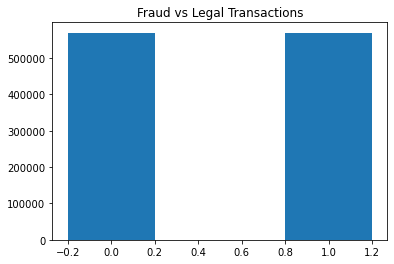

In [130]:
fraudCount = oversampled_Y.sum()
legalCount = oversampled_Y.shape[0] - fraudCount

plt.bar([1,0], [fraudCount, legalCount], width=0.4)
plt.title('Fraud vs Legal Transactions');

In [154]:
X_trainOS, X_testOS, y_trainOS, y_testOS = train_test_split(oversampled_X, oversampled_Y, test_size=0.2, random_state=0);

In [156]:
dt_clf2 = DecisionTreeClassifier()
dt_clf2.fit(X_trainOS,y_trainOS)

DecisionTreeClassifier()

In [159]:
pred3 = dt_clf2.predict(X_testOS)
pred3.sum()

114543

In [160]:
confusion_matrix(y_testOS, pred3)

array([[111170,   2698],
       [  2238, 111845]])

In [162]:
print(classification_report(y_testOS, pred3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113868
           1       0.98      0.98      0.98    114083

    accuracy                           0.98    227951
   macro avg       0.98      0.98      0.98    227951
weighted avg       0.98      0.98      0.98    227951



In [163]:
rf_clf2 = RandomForestClassifier(max_depth=10, random_state=0)

In [167]:
rf_clf2.fit(X_trainOS, y_trainOS)

RandomForestClassifier(max_depth=10, random_state=0)

In [168]:
pred4 = rf_clf2.predict(X_testOS)
pred4.sum()

110559

In [169]:
confusion_matrix(y_testOS, pred4)

array([[110105,   3763],
       [  7287, 106796]])

In [170]:
print(classification_report(y_testOS, pred4))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    113868
           1       0.97      0.94      0.95    114083

    accuracy                           0.95    227951
   macro avg       0.95      0.95      0.95    227951
weighted avg       0.95      0.95      0.95    227951



In [172]:
import matplotlib.pyplot as plt
from sklearn import metrics

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


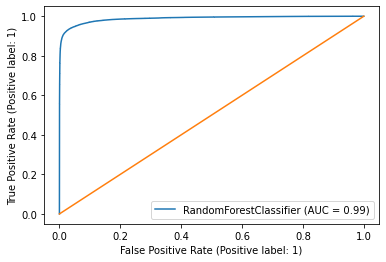

In [174]:
metrics.plot_roc_curve(rf_clf2, X_testOS, y_testOS)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000))

## Conclusion 

* In this project we were able to see how the dataset we received was unbalanced and we were able to see how that dataset is useless for prediction since if even it predicts all cases as non frodulent we will get an accuracy of 97% 
* Then we explored the method known as SMOTE for oversampling the dataset which helped us to balance the dataset and predict better for both the categories 